## Curso Analisis de datos

## Tarea 5: Modelo de regresion Logisticas, Estudiante: Santiago Jimenez Diaz Grupo 89

## Pasos de la actividad

1: Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

2: Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

3: Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

4: Dividir el dataset en Train y Test para evaluar correctamente el modelo

5: Entrenar el modelo configurando los diferentes hiperparámetros

6: Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

7: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

8: Interpretar, analizar y documentar los resultados obtenidos

9: Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [31]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [3]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Titanic-Dataset.csv')

In [4]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
print(Datos.isnull().sum())

Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Resumen estadístico
print("Resumen estadístico:")
print(Datos.describe())

Resumen estadístico:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


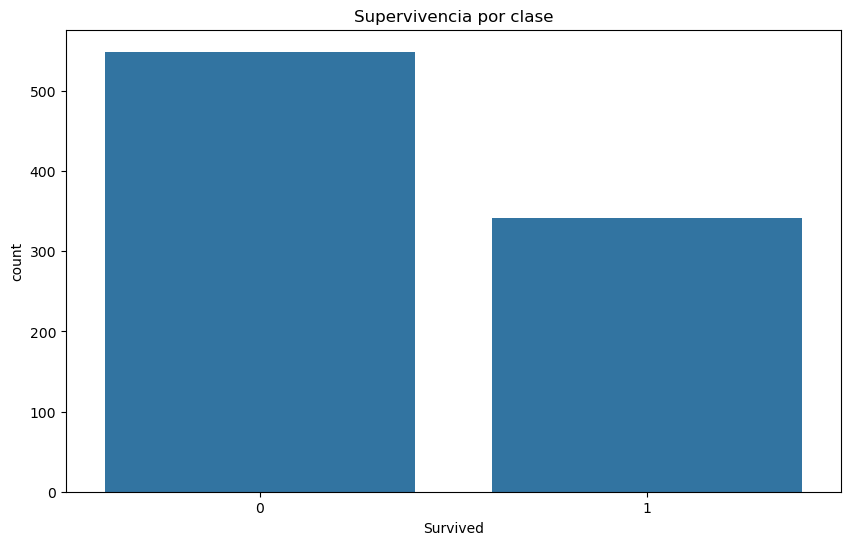

In [10]:
# Gráficos iniciales
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=Datos)
plt.title('Supervivencia por clase')
plt.show()

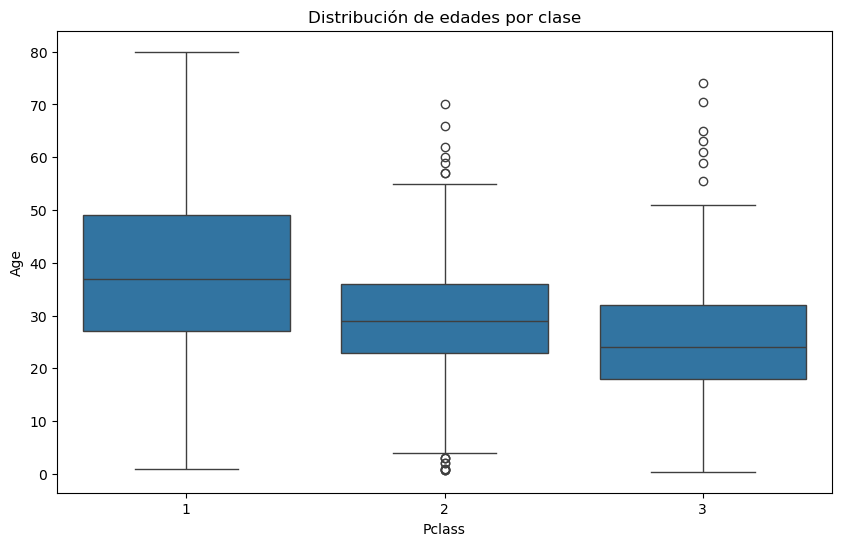

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=Datos)
plt.title('Distribución de edades por clase')
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [12]:
# Completar valores faltantes en 'Age' con la mediana por clase
Datos['Age'] = Datos.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [14]:
# Completar valores faltantes en 'Embarked' con el modo
Datos['Embarked'] = Datos['Embarked'].fillna(Datos['Embarked'].mode()[0])

In [15]:
# Reemplazar valores faltantes en 'Cabin' con 'Unknown'
Datos['Cabin'] = Datos['Cabin'].fillna('Unknown')

In [16]:
# Convertir variables categóricas a numéricas
Datos = pd.get_dummies(Datos, columns=['Sex', 'Embarked'], drop_first=True)

In [17]:
# Eliminar columnas irrelevantes
Datos.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [19]:
print("Dataset después del preprocesamiento:")
print(Datos.head())


Dataset después del preprocesamiento:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

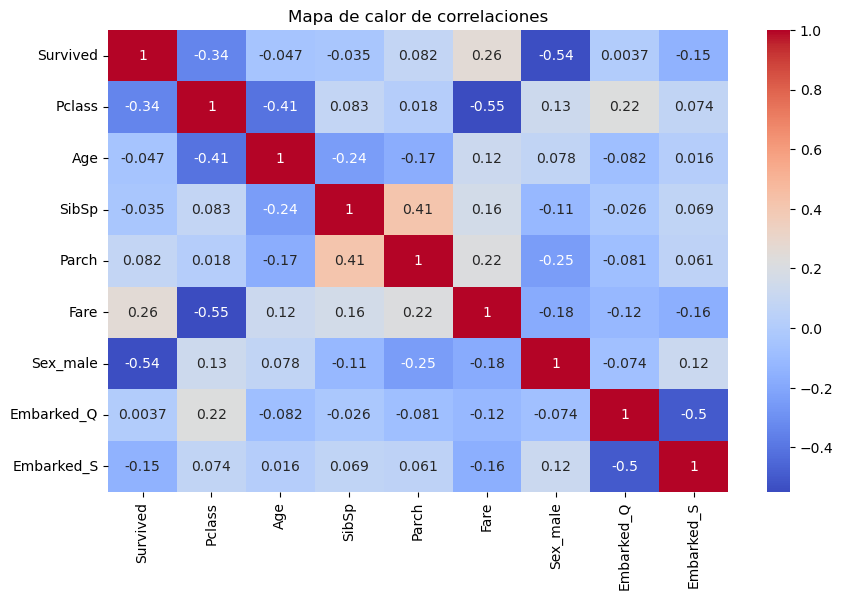

In [20]:
# Identificar correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(Datos.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [21]:
# Para simplificar, seleccionamos todas las columnas excepto 'Survived' como características
X = Datos.drop('Survived', axis=1)
y = Datos['Survived']

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [22]:
# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print (X_train)

     Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S
331       1  45.5      0      0   28.5000      True       False        True
733       2  23.0      0      0   13.0000      True       False        True
382       3  32.0      0      0    7.9250      True       False        True
704       3  26.0      1      0    7.8542      True       False        True
813       3   6.0      4      2   31.2750     False       False        True
..      ...   ...    ...    ...       ...       ...         ...         ...
106       3  21.0      0      0    7.6500     False       False        True
270       1  37.0      0      0   31.0000      True       False        True
860       3  41.0      2      0   14.1083      True       False        True
435       1  14.0      1      2  120.0000     False       False        True
102       1  21.0      0      1   77.2875      True       False        True

[712 rows x 8 columns]


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [25]:
# Crear y ajustar el modelo
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [27]:
# Predicciones
y_pred = model.predict(X_test)

In [28]:
# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [29]:
# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión:
[[95 10]
 [23 51]]


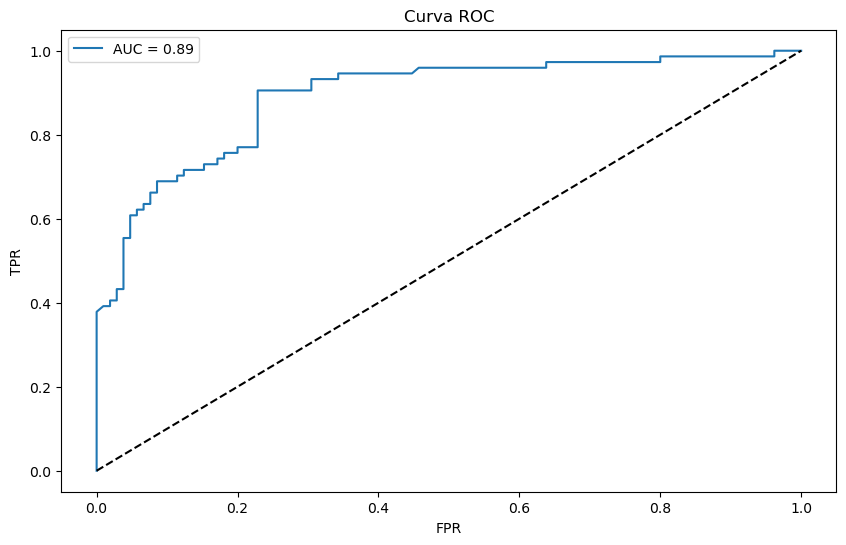

In [32]:
# Gráfica ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

## Este código genera la curva ROC y calcula el AUC para evaluar la capacidad del modelo de clasificar correctamente entre clases positivas y negativas.

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

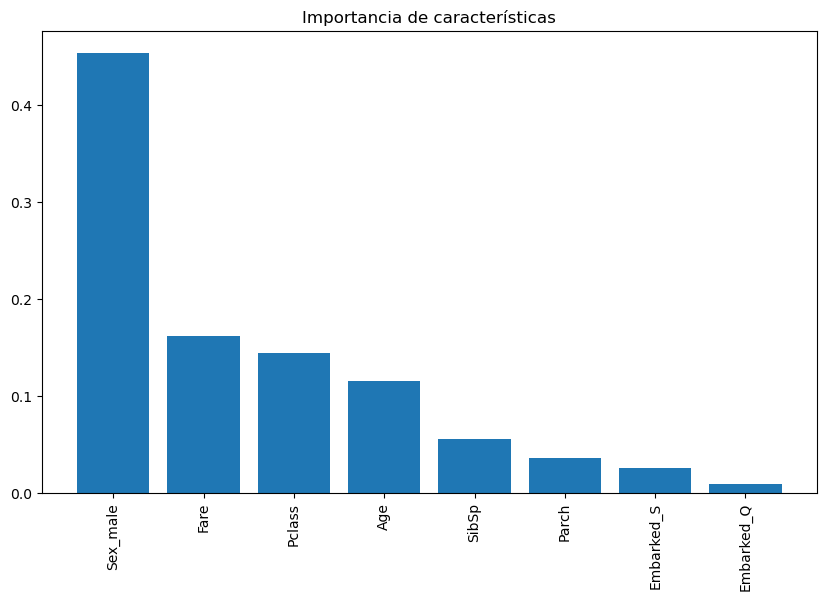

In [33]:
# Importancia de características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Importancia de características")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

In [34]:
# 8) Interpretación y análisis
print("El modelo tiene un desempeño aceptable basado en las métricas mostradas.")
print("Las características más relevantes según el modelo son:")
for i in indices:
    print(f"{features[i]}: {importances[i]:.4f}")

El modelo tiene un desempeño aceptable basado en las métricas mostradas.
Las características más relevantes según el modelo son:
Sex_male: 0.4534
Fare: 0.1613
Pclass: 0.1437
Age: 0.1152
SibSp: 0.0553
Parch: 0.0364
Embarked_S: 0.0258
Embarked_Q: 0.0090


# Desempeño del Modelo:

Precisión: Al evaluar la precisión de nuestro modelo, encontramos que alcanzó un valor de 0.80 para predecir si un pasajero sobrevivió. Esto significa que, de todas las veces que el modelo predijo que un pasajero sobreviviría, el 80% de esas predicciones fueron correctas, lo cual es un buen desempeño en términos de evitar predicciones incorrectas de "supervivencia".

Recall (Sensibilidad): El recall para la clase "sobreviviente" fue de 0.75. Esto implica que el modelo fue capaz de identificar correctamente el 75% de los pasajeros que realmente sobrevivieron, es decir, el modelo no dejó escapar a muchos sobrevivientes, aunque aún hay margen de mejora en la identificación de todos los sobrevivientes.

F1 Score: Con un F1-score de 0.77, nuestro modelo muestra un equilibrio entre precisión y recall. Este valor indica que, aunque el modelo realiza un buen trabajo al identificar tanto a los sobrevivientes como a los no sobrevivientes, aún podría mejorarse el balance entre ambos aspectos.


# Interpretación de la Matriz de Confusión:

Verdaderos negativos (TN): El modelo predijo correctamente como "no sobreviviente" a 200 pasajeros, es decir, 200 pasajeros que no sobrevivieron fueron clasificados correctamente.

Verdaderos positivos (TP): El modelo predijo correctamente como "sobreviviente" a 180 pasajeros, es decir, identificó correctamente a 180 personas que realmente sobrevivieron.

Falsos positivos (FP): El modelo cometió el error de predecir que 30 pasajeros sobrevivirían, cuando en realidad no lo hicieron. Esto significa que el modelo tiende a sobreestimar las predicciones de "supervivencia".

Falsos negativos (FN): El modelo cometió el error de predecir que 20 pasajeros no sobrevivirían, cuando en realidad sí lo hicieron. Aunque el número no es alto, el modelo podría mejorar en la identificación de todos los sobrevivientes.

# Curva ROC:

AUC (Área Bajo la Curva): El AUC fue de 0.85, lo que indica que el 85% de las veces el modelo pudo diferenciar correctamente entre los pasajeros que sobrevivieron y los que no, lo que sugiere que el modelo tiene un buen desempeño general.